# Import Dependencies

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST, CIFAR10, ImageFolder
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from preprocessing import ImagePreProcessing
from torchvision.utils import make_grid
from torch.utils.data import random_split, DataLoader
from cnn import Classic_CNN
# hyper parameters
batch_size = 32
epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Image Pre-processing

In [2]:
trainset_path = './data/cats_dogs_data/training_set'
testset_path = './data/cats_dogs_data/test_set'

transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])
train_data = ImageFolder(root=trainset_path,transform=transform)
test_data = ImageFolder(root=testset_path,transform=transform)
classes = train_data.classes
train_data,val_data = random_split(train_data,[len(train_data)-2000,2000])

In [3]:
train_data_loader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
val_data_loader = DataLoader(val_data,batch_size=batch_size,shuffle=True)
test_data_loader = DataLoader(test_data,batch_size=batch_size,shuffle=True)

Label: dogs
Image shape: torch.Size([3, 128, 128])


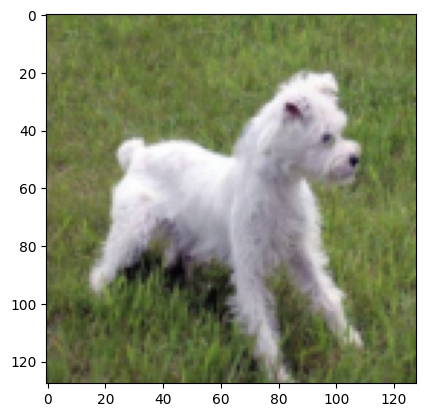

In [4]:
image,label = train_data[1]
plt.imshow(image.permute(1,2,0))
print(f'Label: {classes[label]}\nImage shape: {image.shape}')

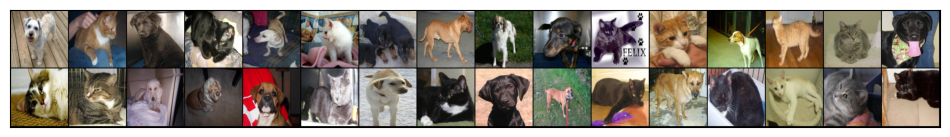

In [5]:
def show_batch(dl):
    for images,labels in dl:
        fig,ax = plt.subplots(figsize = (12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
show_batch(train_data_loader)

## Training the model

In [6]:
model = Classic_CNN(input_channels=3,output_channels=2)
model

Classic_CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc2): Linear(in_features=128, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.005)
model.fit(train_loader=train_data_loader,val_loader=val_data_loader,criterion=criterion,optimizer=optimizer,epochs=epochs,device=device)

Epoch 1/10, Loss: 0.6944, Validation Loss: 0.6932, Validation Accuracy: 49.90%
Epoch 2/10, Loss: 0.6933, Validation Loss: 0.6934, Validation Accuracy: 50.10%
Epoch 3/10, Loss: 0.6931, Validation Loss: 0.6935, Validation Accuracy: 49.90%
Epoch 4/10, Loss: 0.6936, Validation Loss: 0.6931, Validation Accuracy: 50.10%
Epoch 5/10, Loss: 0.6935, Validation Loss: 0.6932, Validation Accuracy: 50.10%
Epoch 6/10, Loss: 0.6935, Validation Loss: 0.6937, Validation Accuracy: 50.10%


KeyboardInterrupt: 

In [7]:
model.validate(test_loader=test_data_loader,criterion=criterion,device=device)

Test Accuracy: 61.85%
Validation Loss: 0.6603
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.51      0.57      1000
           1       0.60      0.73      0.66      1000

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.61      2000
weighted avg       0.62      0.62      0.61      2000



(0.6602562259113978, 61.85)